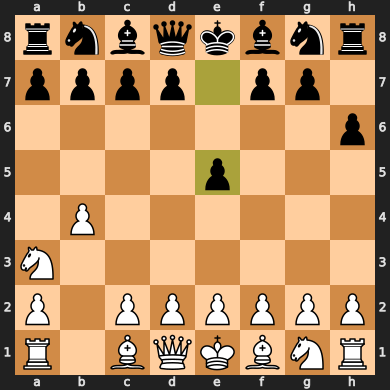

In [5]:
import numpy as np
import matplotlib.pyplot as plt

import chess

from env import *
env = Chess_env()
obs = env.reset()

from deepQ import *


env.board

In [ ]:
for step in range(2):
    action = np.random.choice(list(env.board.legal_moves))
    _,_,done,_ = env.step(action)
        

    stockfish.set_fen_position(env.board.fen())
    print(stockfish.get_best_move())

env.board

In [ ]:
list(env.board.legal_moves)[10:]

In [4]:
model = DeepQ(env, dropout_rate=0.2, n_channels=128, n_residual=3)
model.model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 8, 8, 16)]   0                                            
__________________________________________________________________________________________________
model (Functional)              (None, 8, 8, 128)    907648      input_4[0][0]                    
__________________________________________________________________________________________________
conv2d_19 (Conv2D)              (None, 8, 8, 1)      129         model[0][0]                      
__________________________________________________________________________________________________
dropout_17 (Dropout)            (None, 8, 8, 1)      0           conv2d_19[0][0]                  
____________________________________________________________________________________________

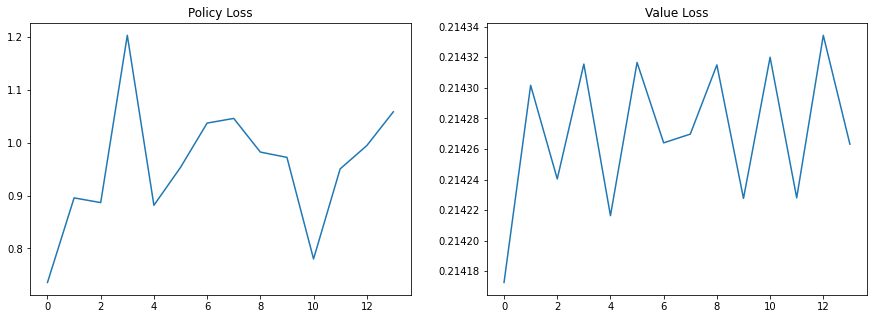

Batch : 1/16


 17%|█▋        | 25/149 [00:00<00:01, 73.31it/s]


Batch : 2/16


 28%|██▊       | 42/149 [00:00<00:01, 78.82it/s]


Batch : 3/16


 59%|█████▉    | 88/149 [00:01<00:00, 77.47it/s]


Batch : 4/16


 17%|█▋        | 25/149 [00:00<00:01, 82.07it/s]


Batch : 5/16


  7%|▋         | 10/149 [00:00<00:01, 71.41it/s]


Batch : 6/16


 53%|█████▎    | 79/149 [00:00<00:00, 90.22it/s]


Batch : 7/16


 44%|████▎     | 65/149 [00:00<00:00, 90.50it/s]


Batch : 8/16


 23%|██▎       | 35/149 [00:00<00:01, 77.38it/s]


Batch : 9/16


 13%|█▎        | 20/149 [00:00<00:01, 83.11it/s]


Batch : 10/16


 42%|████▏     | 62/149 [00:00<00:00, 88.55it/s]


Batch : 11/16


 31%|███       | 46/149 [00:00<00:01, 89.44it/s]


Batch : 12/16


 28%|██▊       | 42/149 [00:00<00:01, 87.29it/s]


Batch : 13/16


 26%|██▌       | 39/149 [00:00<00:01, 70.16it/s]


Batch : 14/16


 15%|█▌        | 23/149 [00:00<00:01, 84.26it/s]


Batch : 15/16


 17%|█▋        | 26/149 [00:00<00:01, 76.43it/s]


Batch : 16/16


 29%|██▉       | 43/149 [00:00<00:01, 80.87it/s]


In [7]:
model.pre_train(
            max_epoch= 500, 
            batch_size = 16,
            max_steps_per_episode = 150,
            learning_rate = 1e-2,
            update_target = 1000000000000000,
            jupyter=True
        )

In [6]:
model.model = keras.models.load_model('model')


In [ ]:
from stockfish import Stockfish

stockfish = Stockfish(path="C:/Users/Philippe/Downloads/stockfish_13_win_x64_avx2/stockfish_13_win_x64_avx2")



stockfish.set_fen_position(env.board.fen())
stockfish.get_best_move()

In [ ]:
env.board

In [ ]:
%%time
model.predict_move_to_play_MCTS(2, env,100)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

model.train(
    max_epoch = 300, 
    epsilon_random_frames = 0,
    epsilon_greedy_frames = 5,
    epsilon = 0.01,
    epsilon_min = 0.,
    batch_size = 16,
    max_steps_per_episode = 150,
    learning_rate=1e-3,
    MCTS_depth=2,
    MCTS_iterations=50 
    )

In [ ]:
 _ = env.reset()

In [ ]:
for step in range(20):
    action = np.random.choice(list(env.board.legal_moves))
    _,_,done,_ = env.step(action)



In [ ]:
env.board

In [ ]:
_ = env.step('e7e6')

In [ ]:
model.predict_move_to_play_MCTS(2,env,50)

In [ ]:
model.predict_move_to_play_MCTS(2,env,50, white=False)

In [ ]:
model.model.predict(env.board_feat.board.reshape(1,8,8,-1))